In [1]:
from utils.config import Config
from model.fasterrcnn import FasterRCNNTrainer, FasterRCNN
import tensorflow as tf
from utils.data import Dataset

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
VOC_BBOX_LABEL_NAMES = (
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
    'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
    'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor')


In [3]:
config = Config()
config._parse({})

dataset = Dataset(config)

frcnn = FasterRCNN(21, (7, 7))

======user config========
{'max_size': 1000,
 'min_size': 600,
 'roi_sigma': 1.0,
 'rpn_sigma': 3.0,
 'voc_data_dir': 'D:/DataClinic/simple-faster-rcnn-pytorch/VOCdevkit/VOC2007/'}
==========end============


In [4]:
model = FasterRCNNTrainer(frcnn)
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-4)
# 相当于build一下模型
img, bboxes, labels, scale = dataset[1]
x = tf.convert_to_tensor(img, dtype=tf.float32)
x = tf.expand_dims(x, axis=0)
_, _, _, _ = model(x, bboxes, labels, scale)
# 然后就能载入权重了
model.load_weights('frcnn.h5')

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib notebook

In [7]:
img, bboxes, labels, scale = dataset[2333]
img_size = img.shape[:2]
x = tf.convert_to_tensor(img, dtype=tf.float32)
x = tf.expand_dims(x, axis=0)

In [8]:
bbox, label, score = model.faster_rcnn.predict(x, img_size)

tf.Tensor(0.02842563, shape=(), dtype=float32)
tf.Tensor(0.024111742, shape=(), dtype=float32)
tf.Tensor(0.03386638, shape=(), dtype=float32)
tf.Tensor(0.02367992, shape=(), dtype=float32)
tf.Tensor(0.006301364, shape=(), dtype=float32)
tf.Tensor(0.02702669, shape=(), dtype=float32)
tf.Tensor(0.06288624, shape=(), dtype=float32)
tf.Tensor(0.06569925, shape=(), dtype=float32)
tf.Tensor(0.021819878, shape=(), dtype=float32)
tf.Tensor(0.014706256, shape=(), dtype=float32)
tf.Tensor(0.032189, shape=(), dtype=float32)
tf.Tensor(0.07121341, shape=(), dtype=float32)
tf.Tensor(0.038645495, shape=(), dtype=float32)
tf.Tensor(0.032152906, shape=(), dtype=float32)
tf.Tensor(0.13092455, shape=(), dtype=float32)
tf.Tensor(0.02128512, shape=(), dtype=float32)
tf.Tensor(0.008090387, shape=(), dtype=float32)
tf.Tensor(0.064333476, shape=(), dtype=float32)
tf.Tensor(0.069707885, shape=(), dtype=float32)
tf.Tensor(0.015744714, shape=(), dtype=float32)


In [9]:
label = tf.cast(label, tf.int32).numpy()

In [10]:
score

array([0.13092455, 0.109854  , 0.109854  , 0.10930149, 0.10692487,
       0.10692487, 0.10692487, 0.10046101, 0.10000948], dtype=float32)

<IPython.core.display.Javascript object>


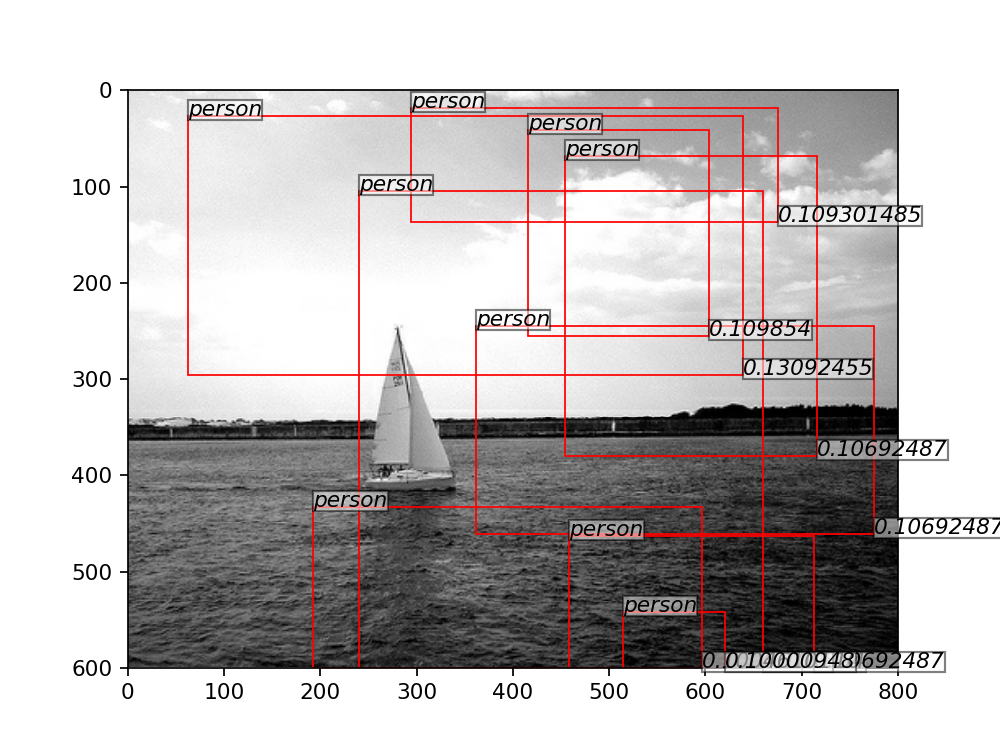

In [11]:
keep_idx = score > 0.1
bbox = bbox[keep_idx]
label = label[keep_idx]
score = score[keep_idx]

img = (img + 1) / 2.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(img)


for i in range(len(bbox)):
    y1 = bbox[i][0]
    x1 = bbox[i][1]
    y2 = bbox[i][2]
    x2 = bbox[i][3]
    height = y2 - y1
    width = x2 - x1
    ax.add_patch(plt.Rectangle((x1,y1), width, height, fill=False, edgecolor='red', linewidth=0.8))
    ax.text(x1,y1,VOC_BBOX_LABEL_NAMES[label[i]],style='italic',bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 0})
    ax.text(x2,y2,score[i],style='italic',bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 0})
